
## Классификация изображений из датасета [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)


## Часть 1

Требования

1. Используйте фреймворк [Pytorch](https://pytorch.org/)

2. Не используйте предобученные модели.

3. Можете загрузить готовую модель или использовать собственную архитектуру.

4. Выберите способ оценки качества предсказаний модели. Обоснуйте его.

5. Проведите обучение. Продемонстрируйте умение использовать соответствующие инструменты.

6. Оцените полученный результат.

*Не используйте инструменты принцип работы которых вам непонятен.

### Данные

In [38]:
from torchvision import models, datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  
    transforms.RandomRotation(15), 
    transforms.RandomCrop(32, padding=4), 
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

train_dataset = datasets.CIFAR10("content", train=True, download=True, transform=train_transform)
test_dataset = datasets.CIFAR10("content", train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [39]:
from torch.utils.data import DataLoader

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


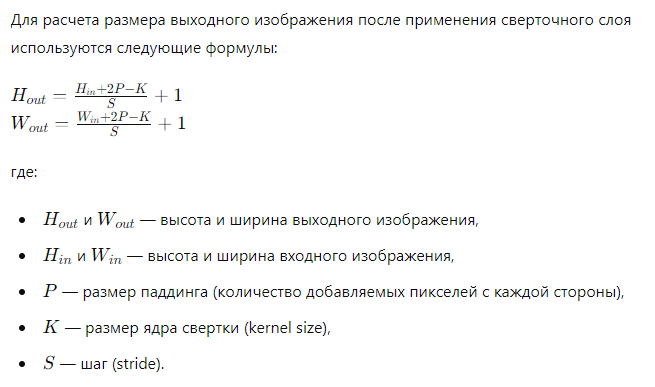

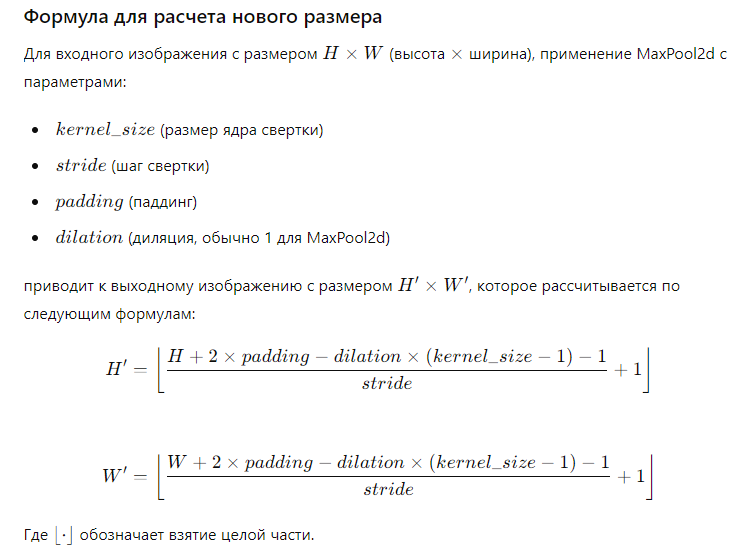

### Модель

In [41]:
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2), 

        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(4 * 4 * 128, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5), 
            nn.Linear(256, 10),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


### Обучение

In [42]:
import torch
import torch.optim as optim
from tqdm import tqdm

def train_model(model, train_loader, valid_loader, num_epochs=10, learning_rate=0.001, device='cuda'):
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        model.train() 
        running_loss = 0.0

        for inputs, labels in tqdm(train_loader, f"Epoch [{epoch+1}/{num_epochs}]"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)

            loss = criterion(outputs, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)

        model.eval()  
        val_correct_predictions = 0
        val_total_predictions = 0
        train_correct_predictions = 0
        train_total_predictions = 0

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)

                _, predicted = torch.max(outputs.data, 1)
                val_total_predictions += labels.size(0)
                val_correct_predictions += (predicted == labels).sum().item()

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)

                _, predicted = torch.max(outputs.data, 1)
                train_total_predictions += labels.size(0)
                train_correct_predictions += (predicted == labels).sum().item()
            

        val_accuracy = val_correct_predictions / val_total_predictions
        train_accuracy = train_correct_predictions / train_total_predictions

        print(f'Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.2f}')

    print('Обучение завершено')
    return model



In [43]:
model = train_model(CNNModel(), train_loader, test_loader, num_epochs=100, learning_rate=0.001, device='cuda')


Epoch [1/100]:   0%|          | 0/782 [00:00<?, ?it/s]

Epoch [1/100]: 100%|██████████| 782/782 [00:33<00:00, 23.28it/s]


Loss: 1.7416, Train Accuracy: 0.4687, Validation Accuracy: 0.49


Epoch [2/100]: 100%|██████████| 782/782 [00:30<00:00, 25.76it/s]


Loss: 1.3866, Train Accuracy: 0.5350, Validation Accuracy: 0.56


Epoch [3/100]: 100%|██████████| 782/782 [00:31<00:00, 24.78it/s]


Loss: 1.2607, Train Accuracy: 0.5876, Validation Accuracy: 0.61


Epoch [4/100]: 100%|██████████| 782/782 [00:30<00:00, 25.45it/s]


Loss: 1.1701, Train Accuracy: 0.6264, Validation Accuracy: 0.65


Epoch [5/100]: 100%|██████████| 782/782 [00:30<00:00, 25.59it/s]


Loss: 1.1094, Train Accuracy: 0.6342, Validation Accuracy: 0.65


Epoch [6/100]: 100%|██████████| 782/782 [00:42<00:00, 18.27it/s]


Loss: 1.0507, Train Accuracy: 0.6708, Validation Accuracy: 0.69


Epoch [7/100]: 100%|██████████| 782/782 [00:42<00:00, 18.54it/s]


Loss: 1.0066, Train Accuracy: 0.6773, Validation Accuracy: 0.71


Epoch [8/100]: 100%|██████████| 782/782 [00:43<00:00, 18.10it/s]


Loss: 0.9655, Train Accuracy: 0.6908, Validation Accuracy: 0.72


Epoch [9/100]: 100%|██████████| 782/782 [00:43<00:00, 17.78it/s]


Loss: 0.9366, Train Accuracy: 0.7049, Validation Accuracy: 0.73


Epoch [10/100]: 100%|██████████| 782/782 [00:43<00:00, 17.80it/s]


Loss: 0.9030, Train Accuracy: 0.7187, Validation Accuracy: 0.74


Epoch [11/100]: 100%|██████████| 782/782 [00:46<00:00, 16.70it/s]


Loss: 0.8817, Train Accuracy: 0.7261, Validation Accuracy: 0.74


Epoch [12/100]: 100%|██████████| 782/782 [00:45<00:00, 17.26it/s]


Loss: 0.8583, Train Accuracy: 0.7281, Validation Accuracy: 0.74


Epoch [13/100]: 100%|██████████| 782/782 [00:44<00:00, 17.44it/s]


Loss: 0.8411, Train Accuracy: 0.7404, Validation Accuracy: 0.76


Epoch [14/100]: 100%|██████████| 782/782 [00:44<00:00, 17.76it/s]


Loss: 0.8229, Train Accuracy: 0.7461, Validation Accuracy: 0.76


Epoch [15/100]: 100%|██████████| 782/782 [00:44<00:00, 17.62it/s]


Loss: 0.8110, Train Accuracy: 0.7390, Validation Accuracy: 0.75


Epoch [16/100]: 100%|██████████| 782/782 [00:44<00:00, 17.69it/s]


Loss: 0.7901, Train Accuracy: 0.7384, Validation Accuracy: 0.76


Epoch [17/100]: 100%|██████████| 782/782 [00:32<00:00, 24.36it/s]


Loss: 0.7828, Train Accuracy: 0.7471, Validation Accuracy: 0.77


Epoch [18/100]: 100%|██████████| 782/782 [00:30<00:00, 25.73it/s]


Loss: 0.7701, Train Accuracy: 0.7629, Validation Accuracy: 0.77


Epoch [19/100]: 100%|██████████| 782/782 [00:30<00:00, 25.75it/s]


Loss: 0.7638, Train Accuracy: 0.7671, Validation Accuracy: 0.78


Epoch [20/100]: 100%|██████████| 782/782 [00:46<00:00, 16.74it/s]


Loss: 0.7485, Train Accuracy: 0.7616, Validation Accuracy: 0.78


Epoch [21/100]: 100%|██████████| 782/782 [00:42<00:00, 18.50it/s]


Loss: 0.7399, Train Accuracy: 0.7746, Validation Accuracy: 0.78


Epoch [22/100]: 100%|██████████| 782/782 [00:43<00:00, 18.09it/s]


Loss: 0.7309, Train Accuracy: 0.7716, Validation Accuracy: 0.78


Epoch [23/100]: 100%|██████████| 782/782 [00:43<00:00, 18.09it/s]


Loss: 0.7243, Train Accuracy: 0.7856, Validation Accuracy: 0.79


Epoch [24/100]: 100%|██████████| 782/782 [00:42<00:00, 18.25it/s]


Loss: 0.7241, Train Accuracy: 0.7699, Validation Accuracy: 0.79


Epoch [25/100]: 100%|██████████| 782/782 [00:41<00:00, 19.04it/s]


Loss: 0.7109, Train Accuracy: 0.7775, Validation Accuracy: 0.79


Epoch [26/100]: 100%|██████████| 782/782 [00:42<00:00, 18.38it/s]


Loss: 0.7091, Train Accuracy: 0.7891, Validation Accuracy: 0.80


Epoch [27/100]: 100%|██████████| 782/782 [00:43<00:00, 18.08it/s]


Loss: 0.6958, Train Accuracy: 0.7820, Validation Accuracy: 0.79


Epoch [28/100]: 100%|██████████| 782/782 [00:46<00:00, 16.79it/s]


Loss: 0.6956, Train Accuracy: 0.7915, Validation Accuracy: 0.80


Epoch [29/100]: 100%|██████████| 782/782 [00:42<00:00, 18.27it/s]


Loss: 0.6967, Train Accuracy: 0.7969, Validation Accuracy: 0.81


Epoch [30/100]: 100%|██████████| 782/782 [00:34<00:00, 22.89it/s]


Loss: 0.6855, Train Accuracy: 0.7909, Validation Accuracy: 0.80


Epoch [31/100]: 100%|██████████| 782/782 [00:30<00:00, 25.87it/s]


Loss: 0.6885, Train Accuracy: 0.7839, Validation Accuracy: 0.79


Epoch [32/100]: 100%|██████████| 782/782 [00:30<00:00, 25.79it/s]


Loss: 0.6774, Train Accuracy: 0.7964, Validation Accuracy: 0.80


Epoch [33/100]: 100%|██████████| 782/782 [00:39<00:00, 19.86it/s]


Loss: 0.6683, Train Accuracy: 0.7988, Validation Accuracy: 0.80


Epoch [34/100]: 100%|██████████| 782/782 [00:41<00:00, 18.85it/s]


Loss: 0.6706, Train Accuracy: 0.8056, Validation Accuracy: 0.81


Epoch [35/100]: 100%|██████████| 782/782 [00:41<00:00, 18.70it/s]


Loss: 0.6623, Train Accuracy: 0.8023, Validation Accuracy: 0.81


Epoch [36/100]: 100%|██████████| 782/782 [00:43<00:00, 17.88it/s]


Loss: 0.6613, Train Accuracy: 0.8048, Validation Accuracy: 0.81


Epoch [37/100]: 100%|██████████| 782/782 [00:45<00:00, 17.04it/s]


Loss: 0.6559, Train Accuracy: 0.8002, Validation Accuracy: 0.80


Epoch [38/100]: 100%|██████████| 782/782 [00:41<00:00, 18.98it/s]


Loss: 0.6561, Train Accuracy: 0.8023, Validation Accuracy: 0.81


Epoch [39/100]: 100%|██████████| 782/782 [00:41<00:00, 18.70it/s]


Loss: 0.6465, Train Accuracy: 0.7987, Validation Accuracy: 0.80


Epoch [40/100]: 100%|██████████| 782/782 [00:42<00:00, 18.57it/s]


Loss: 0.6445, Train Accuracy: 0.8099, Validation Accuracy: 0.81


Epoch [41/100]: 100%|██████████| 782/782 [00:41<00:00, 19.05it/s]


Loss: 0.6426, Train Accuracy: 0.8130, Validation Accuracy: 0.81


Epoch [42/100]: 100%|██████████| 782/782 [00:40<00:00, 19.09it/s]


Loss: 0.6357, Train Accuracy: 0.8129, Validation Accuracy: 0.81


Epoch [43/100]: 100%|██████████| 782/782 [00:42<00:00, 18.53it/s]


Loss: 0.6354, Train Accuracy: 0.8135, Validation Accuracy: 0.81


Epoch [44/100]: 100%|██████████| 782/782 [00:42<00:00, 18.29it/s]


Loss: 0.6337, Train Accuracy: 0.8070, Validation Accuracy: 0.81


Epoch [45/100]: 100%|██████████| 782/782 [00:43<00:00, 18.14it/s]


Loss: 0.6312, Train Accuracy: 0.8089, Validation Accuracy: 0.81


Epoch [46/100]: 100%|██████████| 782/782 [00:32<00:00, 24.39it/s]


Loss: 0.6321, Train Accuracy: 0.8022, Validation Accuracy: 0.80


Epoch [47/100]: 100%|██████████| 782/782 [00:29<00:00, 26.21it/s]


Loss: 0.6234, Train Accuracy: 0.8136, Validation Accuracy: 0.81


Epoch [48/100]: 100%|██████████| 782/782 [00:30<00:00, 25.80it/s]


Loss: 0.6217, Train Accuracy: 0.8168, Validation Accuracy: 0.81


Epoch [49/100]: 100%|██████████| 782/782 [00:30<00:00, 25.45it/s]


Loss: 0.6207, Train Accuracy: 0.8141, Validation Accuracy: 0.81


Epoch [50/100]: 100%|██████████| 782/782 [00:30<00:00, 25.87it/s]


Loss: 0.6185, Train Accuracy: 0.8134, Validation Accuracy: 0.81


Epoch [51/100]: 100%|██████████| 782/782 [00:29<00:00, 26.83it/s]


Loss: 0.6156, Train Accuracy: 0.8275, Validation Accuracy: 0.82


Epoch [52/100]: 100%|██████████| 782/782 [00:30<00:00, 26.01it/s]


Loss: 0.6104, Train Accuracy: 0.8126, Validation Accuracy: 0.80


Epoch [53/100]: 100%|██████████| 782/782 [00:29<00:00, 26.33it/s]


Loss: 0.6129, Train Accuracy: 0.8231, Validation Accuracy: 0.82


Epoch [54/100]: 100%|██████████| 782/782 [00:30<00:00, 25.90it/s]


Loss: 0.6110, Train Accuracy: 0.8284, Validation Accuracy: 0.82


Epoch [55/100]: 100%|██████████| 782/782 [00:31<00:00, 24.94it/s]


Loss: 0.6065, Train Accuracy: 0.8058, Validation Accuracy: 0.80


Epoch [56/100]: 100%|██████████| 782/782 [00:29<00:00, 26.07it/s]


Loss: 0.6013, Train Accuracy: 0.8178, Validation Accuracy: 0.82


Epoch [57/100]: 100%|██████████| 782/782 [00:29<00:00, 26.25it/s]


Loss: 0.5990, Train Accuracy: 0.8276, Validation Accuracy: 0.81


Epoch [58/100]: 100%|██████████| 782/782 [00:29<00:00, 26.44it/s]


Loss: 0.5964, Train Accuracy: 0.8281, Validation Accuracy: 0.82


Epoch [59/100]: 100%|██████████| 782/782 [00:29<00:00, 26.69it/s]


Loss: 0.6000, Train Accuracy: 0.8243, Validation Accuracy: 0.82


Epoch [60/100]: 100%|██████████| 782/782 [00:28<00:00, 27.24it/s]


Loss: 0.5953, Train Accuracy: 0.8262, Validation Accuracy: 0.82


Epoch [61/100]: 100%|██████████| 782/782 [00:29<00:00, 26.28it/s]


Loss: 0.5958, Train Accuracy: 0.8266, Validation Accuracy: 0.82


Epoch [62/100]: 100%|██████████| 782/782 [00:30<00:00, 25.48it/s]


Loss: 0.5877, Train Accuracy: 0.8323, Validation Accuracy: 0.82


Epoch [63/100]: 100%|██████████| 782/782 [00:30<00:00, 25.41it/s]


Loss: 0.5940, Train Accuracy: 0.8296, Validation Accuracy: 0.82


Epoch [64/100]: 100%|██████████| 782/782 [00:30<00:00, 26.06it/s]


Loss: 0.5830, Train Accuracy: 0.8338, Validation Accuracy: 0.82


Epoch [65/100]: 100%|██████████| 782/782 [00:30<00:00, 25.95it/s]


Loss: 0.5831, Train Accuracy: 0.8326, Validation Accuracy: 0.82


Epoch [66/100]: 100%|██████████| 782/782 [00:29<00:00, 26.21it/s]


Loss: 0.5893, Train Accuracy: 0.8250, Validation Accuracy: 0.81


Epoch [67/100]: 100%|██████████| 782/782 [00:29<00:00, 26.31it/s]


Loss: 0.5861, Train Accuracy: 0.8320, Validation Accuracy: 0.82


Epoch [68/100]: 100%|██████████| 782/782 [00:29<00:00, 26.24it/s]


Loss: 0.5781, Train Accuracy: 0.8323, Validation Accuracy: 0.82


Epoch [69/100]: 100%|██████████| 782/782 [00:29<00:00, 26.12it/s]


Loss: 0.5807, Train Accuracy: 0.8352, Validation Accuracy: 0.82


Epoch [70/100]: 100%|██████████| 782/782 [00:29<00:00, 26.23it/s]


Loss: 0.5749, Train Accuracy: 0.8344, Validation Accuracy: 0.81


Epoch [71/100]: 100%|██████████| 782/782 [00:30<00:00, 25.96it/s]


Loss: 0.5744, Train Accuracy: 0.8386, Validation Accuracy: 0.82


Epoch [72/100]: 100%|██████████| 782/782 [00:30<00:00, 26.05it/s]


Loss: 0.5791, Train Accuracy: 0.8348, Validation Accuracy: 0.82


Epoch [73/100]: 100%|██████████| 782/782 [00:29<00:00, 26.81it/s]


Loss: 0.5804, Train Accuracy: 0.8272, Validation Accuracy: 0.81


Epoch [74/100]: 100%|██████████| 782/782 [00:30<00:00, 25.93it/s]


Loss: 0.5712, Train Accuracy: 0.8349, Validation Accuracy: 0.82


Epoch [75/100]: 100%|██████████| 782/782 [00:29<00:00, 26.52it/s]


Loss: 0.5606, Train Accuracy: 0.8416, Validation Accuracy: 0.82


Epoch [76/100]: 100%|██████████| 782/782 [00:29<00:00, 26.96it/s]


Loss: 0.5703, Train Accuracy: 0.8389, Validation Accuracy: 0.82


Epoch [77/100]: 100%|██████████| 782/782 [00:29<00:00, 26.21it/s]


Loss: 0.5656, Train Accuracy: 0.8384, Validation Accuracy: 0.82


Epoch [78/100]: 100%|██████████| 782/782 [00:30<00:00, 25.65it/s]


Loss: 0.5629, Train Accuracy: 0.8388, Validation Accuracy: 0.82


Epoch [79/100]: 100%|██████████| 782/782 [00:30<00:00, 25.96it/s]


Loss: 0.5619, Train Accuracy: 0.8409, Validation Accuracy: 0.82


Epoch [80/100]: 100%|██████████| 782/782 [00:30<00:00, 26.01it/s]


Loss: 0.5611, Train Accuracy: 0.8392, Validation Accuracy: 0.82


Epoch [81/100]: 100%|██████████| 782/782 [00:29<00:00, 26.88it/s]


Loss: 0.5589, Train Accuracy: 0.8313, Validation Accuracy: 0.82


Epoch [82/100]: 100%|██████████| 782/782 [00:28<00:00, 27.24it/s]


Loss: 0.5636, Train Accuracy: 0.8301, Validation Accuracy: 0.82


Epoch [83/100]: 100%|██████████| 782/782 [00:30<00:00, 25.57it/s]


Loss: 0.5657, Train Accuracy: 0.8367, Validation Accuracy: 0.82


Epoch [84/100]: 100%|██████████| 782/782 [00:30<00:00, 25.58it/s]


Loss: 0.5597, Train Accuracy: 0.8457, Validation Accuracy: 0.83


Epoch [85/100]: 100%|██████████| 782/782 [00:29<00:00, 26.85it/s]


Loss: 0.5488, Train Accuracy: 0.8463, Validation Accuracy: 0.82


Epoch [86/100]: 100%|██████████| 782/782 [00:30<00:00, 25.89it/s]


Loss: 0.5566, Train Accuracy: 0.8410, Validation Accuracy: 0.82


Epoch [87/100]: 100%|██████████| 782/782 [00:29<00:00, 26.47it/s]


Loss: 0.5522, Train Accuracy: 0.8327, Validation Accuracy: 0.82


Epoch [88/100]: 100%|██████████| 782/782 [00:29<00:00, 26.08it/s]


Loss: 0.5579, Train Accuracy: 0.8374, Validation Accuracy: 0.82


Epoch [89/100]: 100%|██████████| 782/782 [00:28<00:00, 27.11it/s]


Loss: 0.5573, Train Accuracy: 0.8411, Validation Accuracy: 0.82


Epoch [90/100]: 100%|██████████| 782/782 [00:30<00:00, 25.88it/s]


Loss: 0.5484, Train Accuracy: 0.8442, Validation Accuracy: 0.82


Epoch [91/100]: 100%|██████████| 782/782 [00:33<00:00, 23.33it/s]


Loss: 0.5481, Train Accuracy: 0.8464, Validation Accuracy: 0.82


Epoch [92/100]: 100%|██████████| 782/782 [00:31<00:00, 24.78it/s]


Loss: 0.5488, Train Accuracy: 0.8425, Validation Accuracy: 0.82


Epoch [93/100]: 100%|██████████| 782/782 [00:34<00:00, 22.83it/s]


Loss: 0.5450, Train Accuracy: 0.8365, Validation Accuracy: 0.82


Epoch [94/100]: 100%|██████████| 782/782 [00:34<00:00, 22.84it/s]


Loss: 0.5465, Train Accuracy: 0.8415, Validation Accuracy: 0.83


Epoch [95/100]: 100%|██████████| 782/782 [00:34<00:00, 22.89it/s]


Loss: 0.5375, Train Accuracy: 0.8288, Validation Accuracy: 0.81


Epoch [96/100]: 100%|██████████| 782/782 [00:30<00:00, 25.98it/s]


Loss: 0.5438, Train Accuracy: 0.8430, Validation Accuracy: 0.83


Epoch [97/100]: 100%|██████████| 782/782 [00:27<00:00, 28.31it/s]


Loss: 0.5447, Train Accuracy: 0.8473, Validation Accuracy: 0.83


Epoch [98/100]: 100%|██████████| 782/782 [00:31<00:00, 24.55it/s]


Loss: 0.5404, Train Accuracy: 0.8449, Validation Accuracy: 0.82


Epoch [99/100]: 100%|██████████| 782/782 [00:26<00:00, 29.33it/s]


Loss: 0.5470, Train Accuracy: 0.8453, Validation Accuracy: 0.83


Epoch [100/100]: 100%|██████████| 782/782 [00:27<00:00, 28.33it/s]


Loss: 0.5349, Train Accuracy: 0.8440, Validation Accuracy: 0.82
Обучение завершено


### Оценка результата

Модель продемонстрировала стабильное улучшение в течение процесса обучения, начиная с точности 46.87% на тренировочной выборке и 49% на валидационной в первой эпохе, и достигнув 82.81% на тренировочной и 82% на валидационной выборке к 100-й эпохе. Это свидетельствует о том, что выбранная архитектура модели и методы аугментации данных были эффективны для задачи классификации изображений из датасета CIFAR-10.

## Часть 2


1. Решите ту же задачу, но без ограничения на использование предобученных моделей.

2. Проведите сравнительный анализ результатов полученных в первой и второй части.


In [44]:
pretrained_model = models.resnet18(pretrained=True)
num_classes = 10
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, num_classes)
pretrained_model = train_model(pretrained_model, train_loader, test_loader, num_epochs=100, learning_rate=0.001, device='cuda')


C:\Users\fluke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\fluke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch [1/100]: 100%|██████████| 782/782 [00:33<00:00, 23.46it/s]


Loss: 1.2364, Train Accuracy: 0.6068, Validation Accuracy: 0.63


Epoch [2/100]: 100%|██████████| 782/782 [00:33<00:00, 23.27it/s]


Loss: 0.9277, Train Accuracy: 0.7007, Validation Accuracy: 0.74


Epoch [3/100]: 100%|██████████| 782/782 [00:34<00:00, 22.92it/s]


Loss: 0.8399, Train Accuracy: 0.7294, Validation Accuracy: 0.75


Epoch [4/100]: 100%|██████████| 782/782 [00:33<00:00, 23.60it/s]


Loss: 0.7919, Train Accuracy: 0.7486, Validation Accuracy: 0.77


Epoch [5/100]: 100%|██████████| 782/782 [00:32<00:00, 23.78it/s]


Loss: 0.7304, Train Accuracy: 0.7610, Validation Accuracy: 0.78


Epoch [6/100]: 100%|██████████| 782/782 [00:34<00:00, 22.99it/s]


Loss: 0.7100, Train Accuracy: 0.7795, Validation Accuracy: 0.79


Epoch [7/100]: 100%|██████████| 782/782 [00:35<00:00, 22.13it/s]


Loss: 0.6563, Train Accuracy: 0.7732, Validation Accuracy: 0.78


Epoch [8/100]: 100%|██████████| 782/782 [00:34<00:00, 22.94it/s]


Loss: 0.6577, Train Accuracy: 0.7940, Validation Accuracy: 0.81


Epoch [9/100]: 100%|██████████| 782/782 [00:33<00:00, 23.15it/s]


Loss: 0.6206, Train Accuracy: 0.8005, Validation Accuracy: 0.81


Epoch [10/100]: 100%|██████████| 782/782 [00:34<00:00, 22.81it/s]


Loss: 0.6004, Train Accuracy: 0.8124, Validation Accuracy: 0.82


Epoch [11/100]: 100%|██████████| 782/782 [00:34<00:00, 22.73it/s]


Loss: 0.5763, Train Accuracy: 0.8176, Validation Accuracy: 0.81


Epoch [12/100]: 100%|██████████| 782/782 [00:33<00:00, 23.06it/s]


Loss: 0.5606, Train Accuracy: 0.7725, Validation Accuracy: 0.78


Epoch [13/100]: 100%|██████████| 782/782 [00:32<00:00, 23.90it/s]


Loss: 0.5583, Train Accuracy: 0.8130, Validation Accuracy: 0.80


Epoch [14/100]: 100%|██████████| 782/782 [00:32<00:00, 23.79it/s]


Loss: 0.5352, Train Accuracy: 0.8267, Validation Accuracy: 0.81


Epoch [15/100]: 100%|██████████| 782/782 [00:33<00:00, 23.38it/s]


Loss: 0.5221, Train Accuracy: 0.8169, Validation Accuracy: 0.80


Epoch [16/100]: 100%|██████████| 782/782 [00:33<00:00, 23.15it/s]


Loss: 0.5256, Train Accuracy: 0.8375, Validation Accuracy: 0.83


Epoch [17/100]: 100%|██████████| 782/782 [00:36<00:00, 21.51it/s]


Loss: 0.4972, Train Accuracy: 0.8349, Validation Accuracy: 0.82


Epoch [18/100]: 100%|██████████| 782/782 [00:32<00:00, 23.71it/s]


Loss: 0.5019, Train Accuracy: 0.8381, Validation Accuracy: 0.83


Epoch [19/100]: 100%|██████████| 782/782 [00:33<00:00, 23.28it/s]


Loss: 0.4756, Train Accuracy: 0.8401, Validation Accuracy: 0.83


Epoch [20/100]: 100%|██████████| 782/782 [00:34<00:00, 22.50it/s]


Loss: 0.4718, Train Accuracy: 0.8475, Validation Accuracy: 0.84


Epoch [21/100]: 100%|██████████| 782/782 [00:34<00:00, 22.70it/s]


Loss: 0.4520, Train Accuracy: 0.8551, Validation Accuracy: 0.84


Epoch [22/100]: 100%|██████████| 782/782 [00:36<00:00, 21.69it/s]


Loss: 0.4471, Train Accuracy: 0.8520, Validation Accuracy: 0.83


Epoch [23/100]: 100%|██████████| 782/782 [00:39<00:00, 19.77it/s]


Loss: 0.4457, Train Accuracy: 0.8572, Validation Accuracy: 0.84


Epoch [24/100]: 100%|██████████| 782/782 [01:01<00:00, 12.70it/s]


Loss: 0.4310, Train Accuracy: 0.8604, Validation Accuracy: 0.84


Epoch [25/100]: 100%|██████████| 782/782 [01:03<00:00, 12.39it/s]


Loss: 0.4266, Train Accuracy: 0.8679, Validation Accuracy: 0.84


Epoch [26/100]: 100%|██████████| 782/782 [01:01<00:00, 12.68it/s]


Loss: 0.4086, Train Accuracy: 0.8673, Validation Accuracy: 0.85


Epoch [27/100]: 100%|██████████| 782/782 [01:00<00:00, 12.91it/s]


Loss: 0.4086, Train Accuracy: 0.8701, Validation Accuracy: 0.84


Epoch [28/100]: 100%|██████████| 782/782 [00:59<00:00, 13.09it/s]


Loss: 0.4003, Train Accuracy: 0.8478, Validation Accuracy: 0.83


Epoch [29/100]: 100%|██████████| 782/782 [01:00<00:00, 12.95it/s]


Loss: 0.4005, Train Accuracy: 0.8778, Validation Accuracy: 0.85


Epoch [30/100]: 100%|██████████| 782/782 [01:00<00:00, 12.94it/s]


Loss: 0.3999, Train Accuracy: 0.8781, Validation Accuracy: 0.85


Epoch [31/100]: 100%|██████████| 782/782 [01:00<00:00, 13.01it/s]


Loss: 0.3879, Train Accuracy: 0.8791, Validation Accuracy: 0.85


Epoch [32/100]: 100%|██████████| 782/782 [01:01<00:00, 12.81it/s]


Loss: 0.3872, Train Accuracy: 0.8770, Validation Accuracy: 0.85


Epoch [33/100]: 100%|██████████| 782/782 [00:37<00:00, 20.70it/s]


Loss: 0.3763, Train Accuracy: 0.8862, Validation Accuracy: 0.85


Epoch [34/100]: 100%|██████████| 782/782 [00:57<00:00, 13.67it/s]


Loss: 0.3723, Train Accuracy: 0.8857, Validation Accuracy: 0.85


Epoch [35/100]: 100%|██████████| 782/782 [00:58<00:00, 13.30it/s]


Loss: 0.3687, Train Accuracy: 0.8834, Validation Accuracy: 0.85


Epoch [36/100]: 100%|██████████| 782/782 [00:59<00:00, 13.14it/s]


Loss: 0.3608, Train Accuracy: 0.8799, Validation Accuracy: 0.84


Epoch [37/100]: 100%|██████████| 782/782 [00:58<00:00, 13.44it/s]


Loss: 0.3588, Train Accuracy: 0.8780, Validation Accuracy: 0.84


Epoch [38/100]: 100%|██████████| 782/782 [00:58<00:00, 13.26it/s]


Loss: 0.4433, Train Accuracy: 0.8801, Validation Accuracy: 0.84


Epoch [39/100]: 100%|██████████| 782/782 [00:59<00:00, 13.16it/s]


Loss: 0.3540, Train Accuracy: 0.8854, Validation Accuracy: 0.85


Epoch [40/100]: 100%|██████████| 782/782 [00:56<00:00, 13.78it/s]


Loss: 0.3304, Train Accuracy: 0.8899, Validation Accuracy: 0.85


Epoch [41/100]: 100%|██████████| 782/782 [00:56<00:00, 13.75it/s]


Loss: 0.3315, Train Accuracy: 0.8827, Validation Accuracy: 0.84


Epoch [42/100]: 100%|██████████| 782/782 [00:56<00:00, 13.73it/s]


Loss: 0.3364, Train Accuracy: 0.8877, Validation Accuracy: 0.84


Epoch [43/100]: 100%|██████████| 782/782 [00:46<00:00, 16.89it/s]


Loss: 0.3236, Train Accuracy: 0.8972, Validation Accuracy: 0.86


Epoch [44/100]: 100%|██████████| 782/782 [01:02<00:00, 12.60it/s]


Loss: 0.3177, Train Accuracy: 0.8947, Validation Accuracy: 0.86


Epoch [45/100]: 100%|██████████| 782/782 [01:01<00:00, 12.72it/s]


Loss: 0.3519, Train Accuracy: 0.8940, Validation Accuracy: 0.85


Epoch [46/100]: 100%|██████████| 782/782 [01:05<00:00, 12.00it/s]


Loss: 0.3243, Train Accuracy: 0.8939, Validation Accuracy: 0.85


Epoch [47/100]: 100%|██████████| 782/782 [01:02<00:00, 12.61it/s]


Loss: 0.3084, Train Accuracy: 0.9014, Validation Accuracy: 0.85


Epoch [48/100]: 100%|██████████| 782/782 [01:03<00:00, 12.38it/s]


Loss: 0.3050, Train Accuracy: 0.9025, Validation Accuracy: 0.85


Epoch [49/100]: 100%|██████████| 782/782 [01:02<00:00, 12.48it/s]


Loss: 0.3051, Train Accuracy: 0.9063, Validation Accuracy: 0.86


Epoch [50/100]: 100%|██████████| 782/782 [01:01<00:00, 12.78it/s]


Loss: 0.3096, Train Accuracy: 0.8722, Validation Accuracy: 0.84


Epoch [51/100]: 100%|██████████| 782/782 [01:02<00:00, 12.60it/s]


Loss: 0.2993, Train Accuracy: 0.9118, Validation Accuracy: 0.86


Epoch [52/100]: 100%|██████████| 782/782 [01:04<00:00, 12.08it/s]


Loss: 0.3009, Train Accuracy: 0.9062, Validation Accuracy: 0.85


Epoch [53/100]: 100%|██████████| 782/782 [01:02<00:00, 12.60it/s]


Loss: 0.2920, Train Accuracy: 0.9093, Validation Accuracy: 0.85


Epoch [54/100]: 100%|██████████| 782/782 [00:42<00:00, 18.27it/s]


Loss: 0.2813, Train Accuracy: 0.9002, Validation Accuracy: 0.85


Epoch [55/100]: 100%|██████████| 782/782 [00:41<00:00, 19.06it/s]


Loss: 0.3723, Train Accuracy: 0.9089, Validation Accuracy: 0.86


Epoch [56/100]: 100%|██████████| 782/782 [01:00<00:00, 12.88it/s]


Loss: 0.2785, Train Accuracy: 0.9162, Validation Accuracy: 0.86


Epoch [57/100]: 100%|██████████| 782/782 [01:02<00:00, 12.53it/s]


Loss: 0.2745, Train Accuracy: 0.9193, Validation Accuracy: 0.86


Epoch [58/100]: 100%|██████████| 782/782 [01:05<00:00, 11.94it/s]


Loss: 0.2691, Train Accuracy: 0.9141, Validation Accuracy: 0.86


Epoch [59/100]: 100%|██████████| 782/782 [01:05<00:00, 11.87it/s]


Loss: 0.2725, Train Accuracy: 0.9117, Validation Accuracy: 0.86


Epoch [60/100]: 100%|██████████| 782/782 [01:02<00:00, 12.57it/s]


Loss: 0.2697, Train Accuracy: 0.9206, Validation Accuracy: 0.86


Epoch [61/100]: 100%|██████████| 782/782 [01:03<00:00, 12.40it/s]


Loss: 0.2628, Train Accuracy: 0.9179, Validation Accuracy: 0.86


Epoch [62/100]: 100%|██████████| 782/782 [01:01<00:00, 12.66it/s]


Loss: 0.2670, Train Accuracy: 0.9206, Validation Accuracy: 0.86


Epoch [63/100]: 100%|██████████| 782/782 [01:01<00:00, 12.69it/s]


Loss: 0.2594, Train Accuracy: 0.9160, Validation Accuracy: 0.86


Epoch [64/100]: 100%|██████████| 782/782 [01:27<00:00,  8.92it/s]


Loss: 0.2611, Train Accuracy: 0.9160, Validation Accuracy: 0.86


Epoch [65/100]: 100%|██████████| 782/782 [00:56<00:00, 13.77it/s]


Loss: 0.2560, Train Accuracy: 0.9192, Validation Accuracy: 0.85


Epoch [66/100]: 100%|██████████| 782/782 [01:22<00:00,  9.50it/s]


Loss: 0.2555, Train Accuracy: 0.9146, Validation Accuracy: 0.86


Epoch [67/100]: 100%|██████████| 782/782 [01:30<00:00,  8.67it/s]


Loss: 0.2549, Train Accuracy: 0.9215, Validation Accuracy: 0.86


Epoch [68/100]: 100%|██████████| 782/782 [01:31<00:00,  8.51it/s]


Loss: 0.2496, Train Accuracy: 0.9226, Validation Accuracy: 0.86


Epoch [69/100]: 100%|██████████| 782/782 [01:32<00:00,  8.44it/s]


Loss: 0.2458, Train Accuracy: 0.9205, Validation Accuracy: 0.86


Epoch [70/100]: 100%|██████████| 782/782 [01:28<00:00,  8.80it/s]


Loss: 0.2447, Train Accuracy: 0.9253, Validation Accuracy: 0.86


Epoch [71/100]: 100%|██████████| 782/782 [01:27<00:00,  8.96it/s]


Loss: 0.2399, Train Accuracy: 0.9216, Validation Accuracy: 0.86


Epoch [72/100]: 100%|██████████| 782/782 [01:19<00:00,  9.88it/s]


Loss: 0.2559, Train Accuracy: 0.9316, Validation Accuracy: 0.87


Epoch [73/100]: 100%|██████████| 782/782 [01:14<00:00, 10.43it/s]


Loss: 0.2363, Train Accuracy: 0.9264, Validation Accuracy: 0.86


Epoch [74/100]: 100%|██████████| 782/782 [01:32<00:00,  8.41it/s]


Loss: 0.2357, Train Accuracy: 0.9336, Validation Accuracy: 0.86


Epoch [75/100]: 100%|██████████| 782/782 [01:25<00:00,  9.20it/s]


Loss: 0.2310, Train Accuracy: 0.9257, Validation Accuracy: 0.85


Epoch [76/100]: 100%|██████████| 782/782 [01:20<00:00,  9.77it/s]


Loss: 0.2251, Train Accuracy: 0.9263, Validation Accuracy: 0.86


Epoch [77/100]: 100%|██████████| 782/782 [01:20<00:00,  9.75it/s]


Loss: 0.2335, Train Accuracy: 0.9312, Validation Accuracy: 0.86


Epoch [78/100]: 100%|██████████| 782/782 [01:22<00:00,  9.45it/s]


Loss: 0.2253, Train Accuracy: 0.9319, Validation Accuracy: 0.86


Epoch [79/100]: 100%|██████████| 782/782 [01:21<00:00,  9.58it/s]


Loss: 0.2218, Train Accuracy: 0.9321, Validation Accuracy: 0.86


Epoch [80/100]: 100%|██████████| 782/782 [01:27<00:00,  8.98it/s]


Loss: 0.2272, Train Accuracy: 0.9274, Validation Accuracy: 0.86


Epoch [81/100]: 100%|██████████| 782/782 [01:18<00:00, 10.01it/s]


Loss: 0.2205, Train Accuracy: 0.9312, Validation Accuracy: 0.86


Epoch [82/100]: 100%|██████████| 782/782 [01:23<00:00,  9.40it/s]


Loss: 0.2150, Train Accuracy: 0.9335, Validation Accuracy: 0.86


Epoch [83/100]: 100%|██████████| 782/782 [01:24<00:00,  9.27it/s]


Loss: 0.2161, Train Accuracy: 0.9332, Validation Accuracy: 0.86


Epoch [84/100]: 100%|██████████| 782/782 [01:20<00:00,  9.75it/s]


Loss: 0.2146, Train Accuracy: 0.9340, Validation Accuracy: 0.86


Epoch [85/100]: 100%|██████████| 782/782 [01:20<00:00,  9.76it/s]


Loss: 0.2099, Train Accuracy: 0.9325, Validation Accuracy: 0.86


Epoch [86/100]: 100%|██████████| 782/782 [01:20<00:00,  9.67it/s]


Loss: 0.2230, Train Accuracy: 0.9330, Validation Accuracy: 0.86


Epoch [87/100]: 100%|██████████| 782/782 [01:21<00:00,  9.54it/s]


Loss: 0.2067, Train Accuracy: 0.9339, Validation Accuracy: 0.86


Epoch [88/100]: 100%|██████████| 782/782 [00:54<00:00, 14.39it/s]


Loss: 0.2042, Train Accuracy: 0.9399, Validation Accuracy: 0.86


Epoch [89/100]: 100%|██████████| 782/782 [00:47<00:00, 16.34it/s]


Loss: 0.2048, Train Accuracy: 0.9390, Validation Accuracy: 0.87


Epoch [90/100]: 100%|██████████| 782/782 [00:47<00:00, 16.50it/s]


Loss: 0.2033, Train Accuracy: 0.9388, Validation Accuracy: 0.86


Epoch [91/100]: 100%|██████████| 782/782 [00:55<00:00, 14.10it/s]


Loss: 0.2008, Train Accuracy: 0.9392, Validation Accuracy: 0.86


Epoch [92/100]: 100%|██████████| 782/782 [00:50<00:00, 15.60it/s]


Loss: 0.2038, Train Accuracy: 0.9404, Validation Accuracy: 0.86


Epoch [93/100]: 100%|██████████| 782/782 [00:57<00:00, 13.59it/s]


Loss: 0.1968, Train Accuracy: 0.9421, Validation Accuracy: 0.86


Epoch [94/100]: 100%|██████████| 782/782 [01:02<00:00, 12.59it/s]


Loss: 0.1964, Train Accuracy: 0.9428, Validation Accuracy: 0.86


Epoch [95/100]: 100%|██████████| 782/782 [01:09<00:00, 11.31it/s]


Loss: 0.1962, Train Accuracy: 0.9421, Validation Accuracy: 0.86


Epoch [96/100]: 100%|██████████| 782/782 [00:52<00:00, 14.98it/s]


Loss: 0.1864, Train Accuracy: 0.9433, Validation Accuracy: 0.87


Epoch [97/100]: 100%|██████████| 782/782 [00:58<00:00, 13.28it/s]


Loss: 0.1929, Train Accuracy: 0.9425, Validation Accuracy: 0.86


Epoch [98/100]: 100%|██████████| 782/782 [01:14<00:00, 10.54it/s]


Loss: 0.1895, Train Accuracy: 0.9426, Validation Accuracy: 0.86


Epoch [99/100]: 100%|██████████| 782/782 [00:54<00:00, 14.33it/s]


Loss: 0.1863, Train Accuracy: 0.9425, Validation Accuracy: 0.86


Epoch [100/100]: 100%|██████████| 782/782 [00:56<00:00, 13.92it/s]


Loss: 0.1840, Train Accuracy: 0.9403, Validation Accuracy: 0.86
Обучение завершено


В первой части использована самописная сверточная нейронная сеть CNNModel, состоящая из трех сверточных слоев с активацией ReLU, слоями MaxPooling и Dropout, а также классификатором, включающим три полносвязных слоя с ReLU и Dropout. Вторая часть использует предобученную модель ResNet18, заменив конечный полносвязный слой для 10 классов. Обучение обеих моделей проводилось на протяжении 100 эпох. CNNModel достигла точности около 84 процентов на обучающем наборе и около 82 процентов на валидационном наборе, при этом потери колебались около 0.54. ResNet18 показала лучшую точность, около 93 процентов на обучающем наборе и 86 процентов на валидационном, с потерями около 0.21. Среднее время на эпоху для CNNModel составляло около 30 секунд, в то время как для ResNet18 около 80 секунд. ResNet18 демонстрирует лучшие результаты по точности и потерям, однако CNNModel обучается быстрее. 

## Вывод

Предобученная модель лучше справляется с задачей